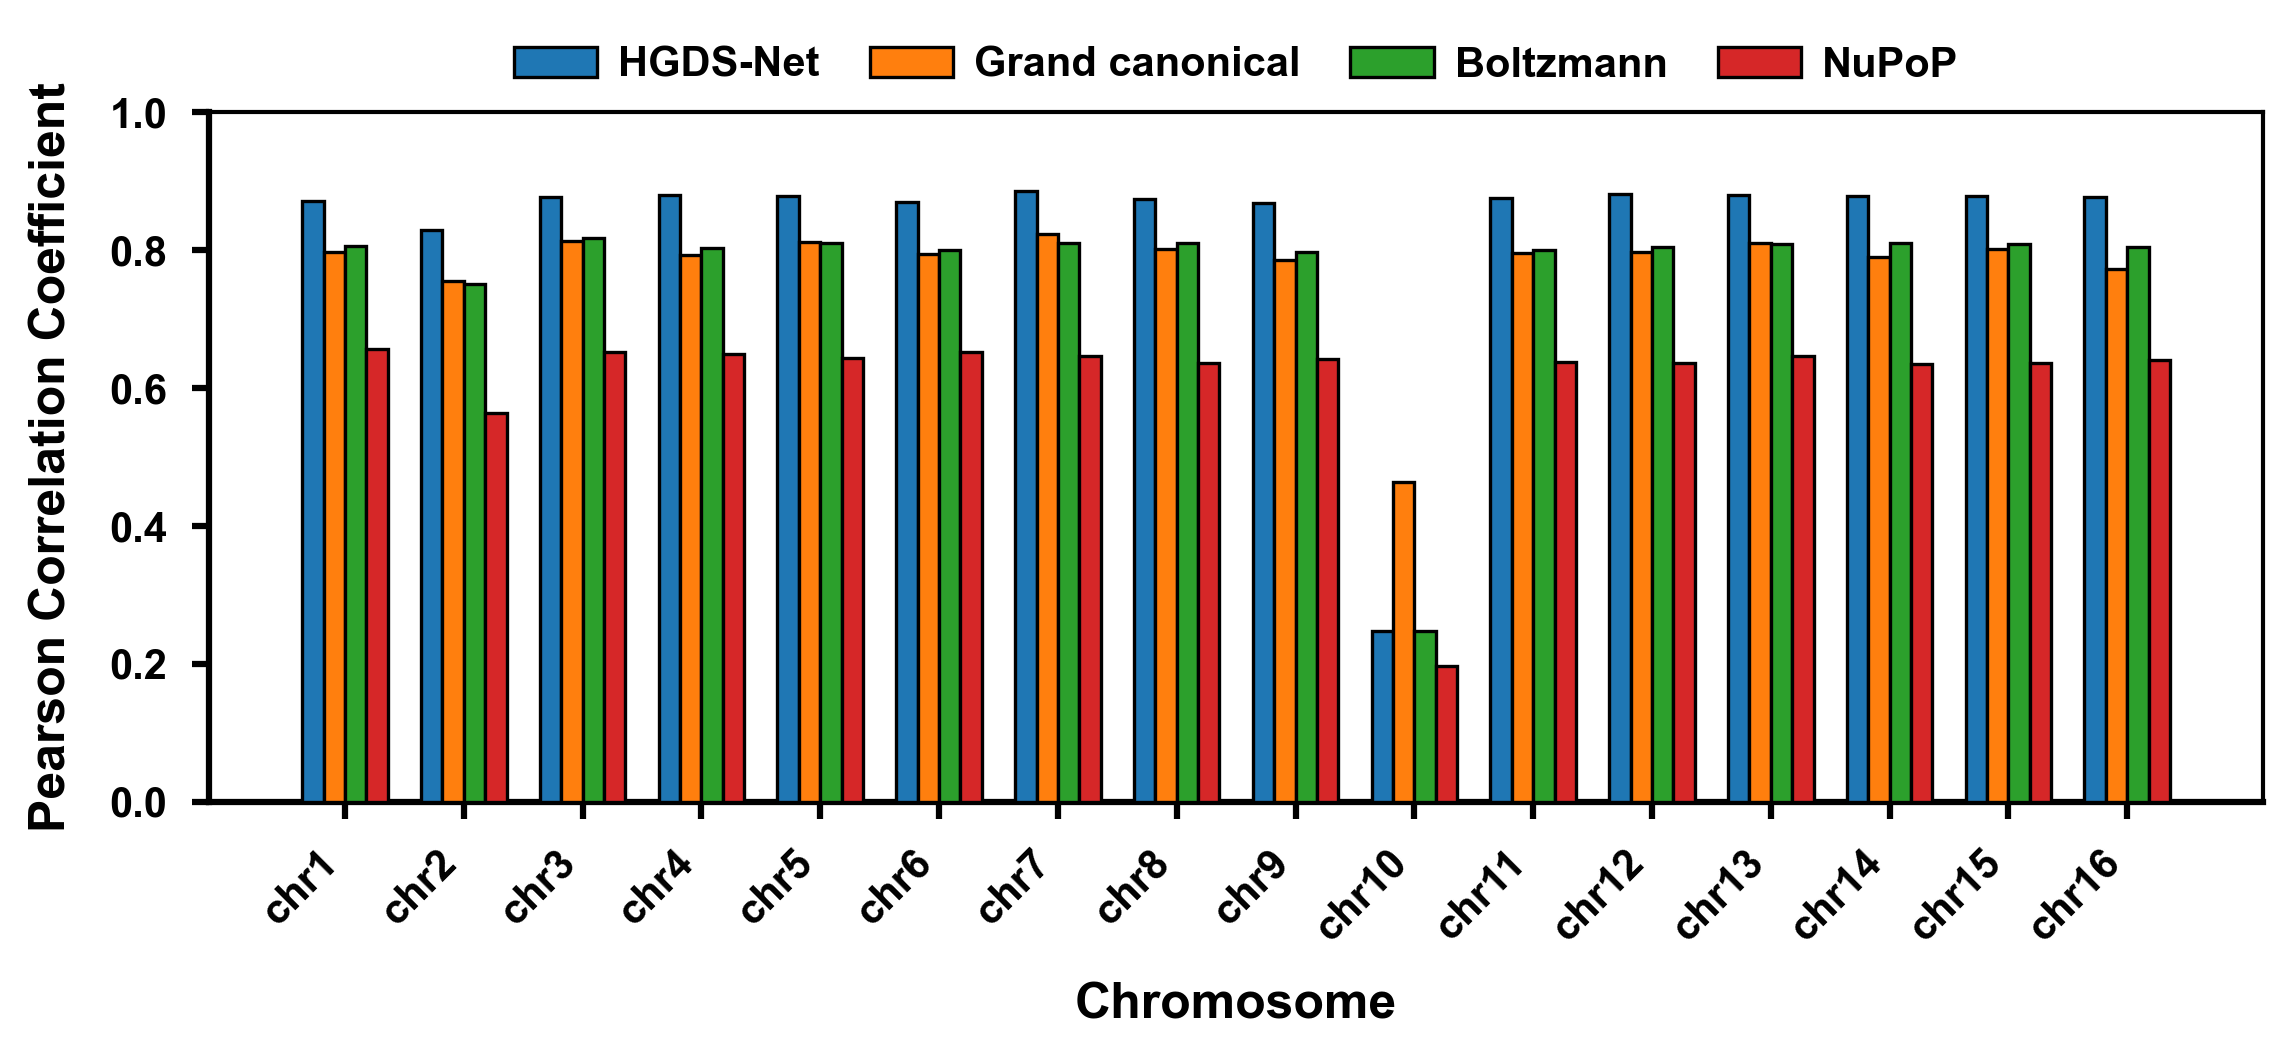

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 数据准备
data = {
    'Chromosome': [f'chr{i}' for i in range(1,17)],
    'HGDS-Net': [0.8711,0.8294,0.8775,0.8808,0.8784,0.8702,0.8857,0.874,0.8687,0.2469,0.8758,0.8811,0.8801,0.8785,0.8785,0.8771],
    'Grand canonical': [0.798,0.756,0.813,0.793,0.812,0.794,0.824,0.802,0.786,0.464,0.796,0.797,0.810,0.790,0.802,0.773],
    'Boltzmann': [0.806,0.751,0.818,0.803,0.811,0.801,0.810,0.811,0.798,0.248,0.801,0.805,0.809,0.810,0.809,0.805],
    'NuPoP': [0.657,0.564,0.652,0.649,0.643,0.652,0.647,0.636,0.642,0.197,0.638,0.637,0.647,0.635,0.637,0.641]
}
df = pd.DataFrame(data)

# 初始化画布
plt.figure(figsize=(8, 4), dpi=300)  # 黄金比例尺寸
ax = plt.gca()

# ================= 核心优化 =================
# 1. 边框控制
ax.spines['top'].set_linewidth(1.0)
ax.spines['right'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

# 2. 字体规范
label_font = {'family': 'Arial', 'weight': 'bold', 'size': 12}
ticks_font = {'family': 'Arial', 'weight': 'bold', 'size': 10}

# 3. 坐标轴标签
ax.set_xlabel('Chromosome', **label_font, labelpad=8)
ax.set_ylabel('Pearson Correlation Coefficient', **label_font, labelpad=8)

# 4. 刻度参数
ax.tick_params(axis='both', which='major', 
              length=4, width=1.5, 
              labelsize=10, pad=6)
# ============================================

# 定义标准色系
colors = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728']
models = ['HGDS-Net', 'Grand canonical', 'Boltzmann', 'NuPoP']

# 绘制柱状图
x = np.arange(len(df['Chromosome']))
width = 0.18
for i, model in enumerate(models):
    offset = width * (i - 1.5)
    ax.bar(x + offset, df[model], width,
           color=colors[i], edgecolor='black', linewidth=0.8,
           zorder=3, label=model)

# 刻度标签
ax.set_xticks(x)
ax.set_xticklabels(df['Chromosome'], 
                  rotation=45, ha='right', **ticks_font)
ax.set_yticks(np.arange(0, 1.1, 0.2))
ax.set_yticklabels([f"{tick:.1f}" for tick in np.arange(0, 1.1, 0.2)], **ticks_font)

# 图例优化
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
         ncol=4, frameon=False,
         prop=ticks_font, 
         handletextpad=0.5,
         columnspacing=1.2)

# 输出设置
plt.tight_layout(pad=2)
plt.savefig('可视化图/模型比对柱形图.pdf', dpi=300, bbox_inches='tight')